# Mesh dependency of axis-symmetric bubble velocities and shapes

Four bubbles are investigated:
- bubbles in aqueous sugar solutions (Bhaga & Weber 1981)
    - dimpled ellipsoidal $Eo=243$, $Mo=266$, $Ga^\prime=80$
    - spherical cap (closed wake) $Eo=115$, $Mo=4.63\times 10^{-3}$, $Ga^\prime = 135$
    - skirted (smooth) $Eo = 339$, $Mo=43.1$, $Ga^\prime = 30.8$
- a small bubble in water at 20°C, $Mo=2.5728\times 10^{-11}$
    - $d_{eq}=1.8~mm$ corresponding to $Eo=0.4361$, $Ga^\prime = 238.29$
    
The shapes are compared at time instances for which the shapes are steady (mostly). The mesh size was varied by setting the maximum allowed refinement level to 14, 15, and 16.

In [1]:
import glob

data_path = "../data/"
bhaga_cases = glob.glob(data_path + "bhaga_0*")
water_cases = glob.glob(data_path + "water_05_l*")
cases = sorted(bhaga_cases + water_cases)
# the Galilei is needed to compute the Reynolds number
# Re = U_b * Ga
Ga = [15.2400, 15.2400, 15.2400, 134.626, 134.626, 134.626, 30.8340, 30.8340, 30.8340, 238.287, 238.287, 238.287]

path_width = len(cases[0])
print("id ", "{:{path_width}}".format("case", path_width=path_width+1), "Ga")
for i, case in enumerate(cases):
    print("{:2d}, {}, {:3.3f}".format(i, case, Ga[i]))

id  case                  Ga
 0, ../data/bhaga_02_l14, 15.240
 1, ../data/bhaga_02_l15, 15.240
 2, ../data/bhaga_02_l16, 15.240
 3, ../data/bhaga_03_l14, 134.626
 4, ../data/bhaga_03_l15, 134.626
 5, ../data/bhaga_03_l16, 134.626
 6, ../data/bhaga_04_l14, 30.834
 7, ../data/bhaga_04_l15, 30.834
 8, ../data/bhaga_04_l16, 30.834
 9, ../data/water_05_l14, 238.287
10, ../data/water_05_l15, 238.287
11, ../data/water_05_l16, 238.287


In [2]:
from helper_module import Logfile

log_files = {}
for case in cases:
    case_name = case.split("/")[-1]
    full_path = case + "/log." + case_name + ".csv"
    log_files[case_name] = Logfile(full_path)
    usecols = ['time', 'u_x', 'x']
    log_files[case_name].read_logfile(usecols=usecols)

Successfully read file ../data/bhaga_02_l14/log.bhaga_02_l14.csv
Successfully read file ../data/bhaga_02_l15/log.bhaga_02_l15.csv
Successfully read file ../data/bhaga_02_l16/log.bhaga_02_l16.csv
Successfully read file ../data/bhaga_03_l14/log.bhaga_03_l14.csv
Successfully read file ../data/bhaga_03_l15/log.bhaga_03_l15.csv
Successfully read file ../data/bhaga_03_l16/log.bhaga_03_l16.csv
Successfully read file ../data/bhaga_04_l14/log.bhaga_04_l14.csv
Successfully read file ../data/bhaga_04_l15/log.bhaga_04_l15.csv
Successfully read file ../data/bhaga_04_l16/log.bhaga_04_l16.csv
Successfully read file ../data/water_05_l14/log.water_05_l14.csv
Successfully read file ../data/water_05_l15/log.water_05_l15.csv
Successfully read file ../data/water_05_l16/log.water_05_l16.csv


In [3]:
log_files[cases[0].split("/")[-1]].log.head()

,time,x,u_x
0,0.000000,3.500000,0.000000
1,0.024626,3.500514,0.046752
2,0.058393,3.502964,0.103733
3,0.095310,3.507709,0.158818
4,0.133473,3.514640,0.209186


In [4]:
# some parameters for plotting
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pickle
from helper_module import fontsize_label, fontsize_legend, fontsize_tick, figure_width, line_width

rc('text', usetex=True)
upper_plot_bounds = [0.0, 0.4, 0.8, 0.6]
lower_plot_bounds = [0.0, 0.0, 0.8, 0.35]
t_min = -1
alpha_window = 0.1
styles = [':', '--', '-']
colors = ["darkgrey", "darkgrey", "black"]
labels = ["Level 14", "Level 15", "Level 16"]
highlight_color = "C0"
output_path = "../output/"

# convinience function for saving plots as png and pdf
def savefig(name):
    plt.savefig(output_path + name + ".png", bbox_inches="tight")
    plt.savefig(output_path + name + ".pdf", bbox_inches="tight")

## Bhaga 02 (d) - dimpled ellipsoidal

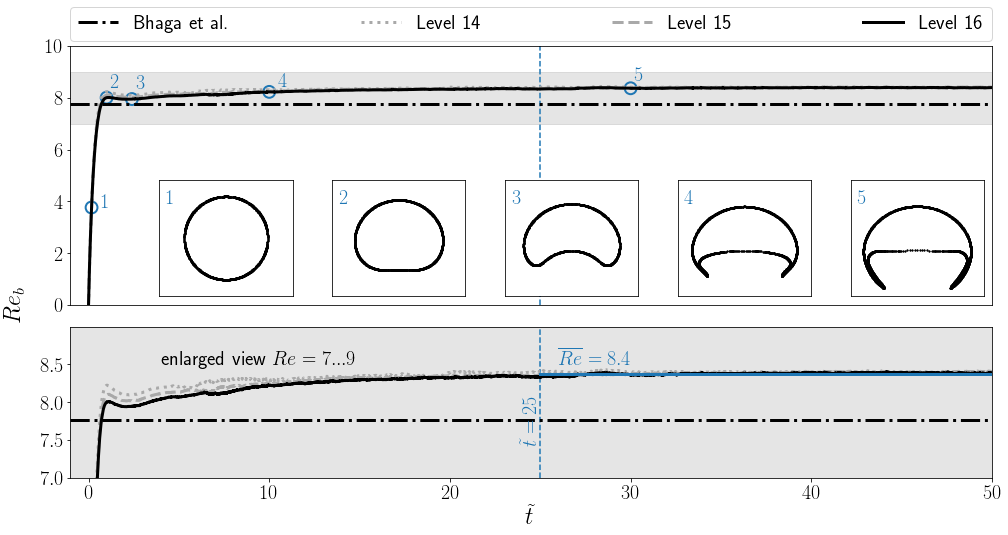

In [5]:
fig = plt.figure(figsize=(figure_width, 6))

# axis limits and zoom window definition
t_max = 50.0
tw_min = 25.0
tw_max = 50.0
re_zoom_min = 7.0
re_zoom_max = 9.0

# create basis for upper part of the plot
ax1 = plt.axes(upper_plot_bounds, xticks=[], xlim=[t_min, t_max], ylim=[0, 10])
ax1.fill_between([-1, 120], [re_zoom_min, re_zoom_min], [re_zoom_max, re_zoom_max], color='k', alpha=alpha_window)
ax1.tick_params(labelsize=fontsize_tick)
ax1.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)
ax1.text(-4.5, 0, r"$Re_b$", va='center', rotation='vertical', fontsize=fontsize_label)

# create basis for lower part of the plot
ax2 = plt.axes(lower_plot_bounds, yticks=[7.0, 7.5, 8.0, 8.5], xlim=[t_min, t_max], ylim=[re_zoom_min, re_zoom_max])
ax2.patch.set_facecolor('k')
ax2.patch.set_alpha(alpha_window)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=fontsize_label)
ax2.tick_params(labelsize=fontsize_tick)
ax2.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)

lines = [] # lines to appear in the legend

# reference curve Bhaga and Weber 1981
lines.append(ax1.plot([t_min, t_max], [7.77, 7.77], linestyle='-.', lw=line_width, color='k', label="Bhaga et al.")[0])
ax2.plot([t_min, t_max], [7.77, 7.77], linestyle='-.', lw=line_width, color='k')

# plot the numerical data in both sub-plots
for i, level in enumerate(range(14,17)):
    log = log_files["bhaga_02_l{:2d}".format(level)]
    t, re = log.get_profile("time", "u_x")
    re = re * Ga[i]
    lines.append(ax1.plot(t, re, color=colors[i], linestyle=styles[i], lw=line_width, label=labels[i])[0])
    ax2.plot(t, re, color=colors[i], linestyle=styles[i], lw=line_width)
    
# indicate statistical values in the lower plot (mean of finest mesh)
re_mean = log_files["bhaga_02_l16"].apply_to_range("time", tw_min, tw_max, "u_x", np.mean) * Ga[2]
ax2.plot([tw_min, tw_max], [re_mean, re_mean], color=highlight_color, lw=line_width)
ax2.text(26, 8.5, r"$\overline{{Re}}={:.1f}$".format(re_mean), fontsize=fontsize_tick, color=highlight_color)
ax2.text(24, 7.9, r"$\tilde{{t}}={:.0f}$".format(tw_min), rotation='vertical', fontsize=fontsize_tick, color=highlight_color)
ax2.text(4, 8.5, r"enlarged view $Re={:.0f}...{:.0f}$".format(re_zoom_min, re_zoom_max), fontsize=fontsize_tick, color='k')

# include bubble shapes of selected time instances (snap shots) into the upper plot
closest_entries = []
for t in [0.17, 1.0, 2.4, 10.0, 30.0]:
    row = log_files["bhaga_02_l16"].find_closest("time", t)
    closest_entries.append(row)
    ax1.scatter(row.time, row.u_x*Ga[2], marker='o', s=140, facecolors='none', edgecolors=highlight_color, linewidth=2)

# draw shapes and position labels close to circles
offset_t = [0.5, 0.2, 0.2, 0.5, 0.2]
offset_re = [-0., 0.4, 0.4, 0.2, 0.3]
for i, row in enumerate(closest_entries):
    ax1.text(row.time+offset_t[i], row.u_x*Ga[2]+offset_re[i], r"${}$".format(i+1), color=highlight_color, fontsize=fontsize_tick)
    ax = plt.axes([0.15*(i+1)-0.15, 0.42, 0.27, 0.27], xticks=[], yticks=[], xlim=[-0.8, 0.8], ylim=[-0.7, 0.7])
    ax.set_aspect('equal')
    path_shape = data_path + "bhaga_02_l16/plic_clean/plic_{:06d}.pkl".format(row.index.values[0]*10)
    with open(path_shape, 'rb') as file:
        shape = pickle.load(file).drop("element", axis=1)
    ax.scatter(shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.scatter(-shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.text(ax.get_xlim()[0]*0.9, ax.get_ylim()[1]*0.6, r"${}$".format(i+1), color=highlight_color, fontsize=fontsize_tick)

ax1.legend(handles=lines, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0., fontsize=fontsize_legend)
savefig("bhaga_02_rise_velocity")

## Bhaga 03 (e) - spherical cap (closed wake)

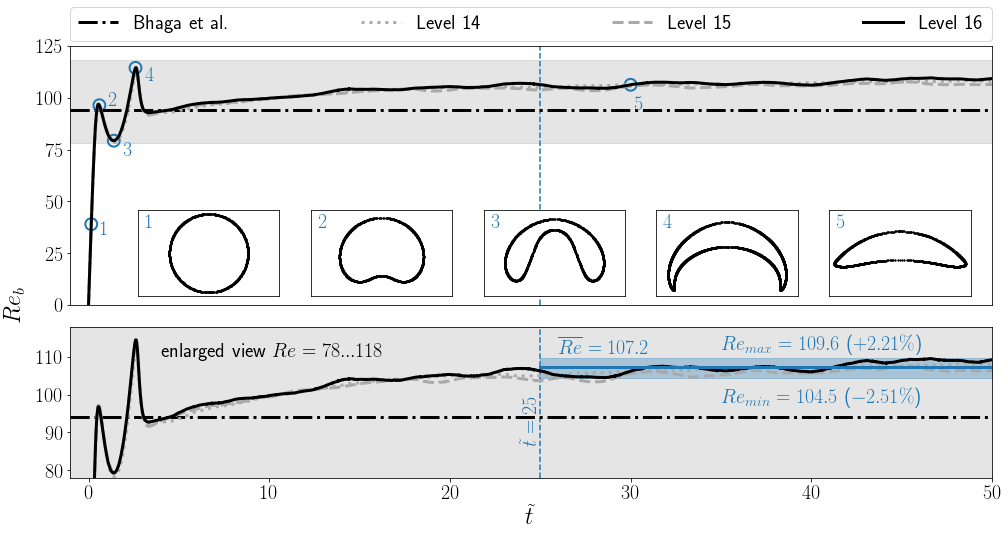

In [6]:
fig = plt.figure(figsize=(figure_width, 6))

# axis limits and zoom window definition
t_max = 50.0
tw_min = 25.0
tw_max = 50.0
re_zoom_min = 78.0
re_zoom_max = 118.0

# create basis for upper part of the plot
ax1 = plt.axes(upper_plot_bounds, xticks=[], xlim=[t_min, t_max], ylim=[0, 125])
ax1.fill_between([-1, 120], [re_zoom_min, re_zoom_min], [re_zoom_max, re_zoom_max], color='k', alpha=alpha_window)
ax1.tick_params(labelsize=fontsize_tick)
ax1.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)
ax1.text(-4.5, 0, r"$Re_b$", va='center', rotation='vertical', fontsize=fontsize_label)

# create basis for lower part of the plot
ax2 = plt.axes(lower_plot_bounds, yticks=[80, 90, 100, 110], xlim=[t_min, t_max], ylim=[re_zoom_min, re_zoom_max])
ax2.patch.set_facecolor('k')
ax2.patch.set_alpha(alpha_window)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=fontsize_label)
ax2.tick_params(labelsize=fontsize_tick)
ax2.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)

lines = [] # lines to appear in the legend

# reference curve Bhaga and Weber 1981
lines.append(ax1.plot([t_min, t_max], [94.0, 94.0], linestyle='-.', lw=line_width, color='k', label="Bhaga et al.")[0])
ax2.plot([t_min, t_max], [94.0, 94.0], linestyle='-.', lw=line_width, color='k')

# plot the numerical data in both sub-plots
for i, level in enumerate(range(14,17)):
    log = log_files["bhaga_03_l{:2d}".format(level)]
    t, re = log.get_profile("time", "u_x")
    re = re * Ga[3+i]
    lines.append(ax1.plot(t, re, color=colors[i], linestyle=styles[i], lw=line_width, label=labels[i])[0])
    ax2.plot(t, re, color=colors[i], linestyle=styles[i], lw=line_width)
    
# indicate statistical values in the lower plot (mean of finest mesh)
re_mean = log_files["bhaga_03_l16"].apply_to_range("time", tw_min, tw_max, "u_x", np.mean) * Ga[5]
re_min, re_max = log_files["bhaga_03_l16"].get_min_max("time", tw_min, tw_max, "u_x")
re_min *= Ga[5]
re_max *= Ga[5]
ax2.fill_between([tw_min, tw_max], [re_min, re_min], [re_max, re_max], color=highlight_color, alpha=0.3)
ax2.plot([tw_min, tw_max], [re_mean, re_mean], color=highlight_color, lw=line_width)
ax2.text(26, 111, r"$\overline{{Re}}={:.1f}$".format(re_mean), fontsize=fontsize_tick, color=highlight_color)
ax2.text(24, 96, r"$\tilde{{t}}={:.0f}$".format(tw_min), rotation='vertical', fontsize=fontsize_tick, color=highlight_color)
ax2.text(4, 110, r"enlarged view $Re={:.0f}...{:.0f}$".format(re_zoom_min, re_zoom_max), fontsize=fontsize_tick, color='k')
ax2.text(35, 97, r"$Re_{{min}}={:.1f}$ (${:+.2f}\%$)".format(re_min, (re_min-re_mean)/re_mean*100), fontsize=fontsize_tick, color=highlight_color)
ax2.text(35, 111, r"$Re_{{max}}={:.1f}$ (${:+.2f}\%$)".format(re_max, (re_max-re_mean)/re_mean*100), fontsize=fontsize_tick, color=highlight_color)

# include bubble shapes of selected time instances (snap shots) into the upper plot
closest_entries = []
for t in [0.15, 0.6, 1.4, 2.6, 30.0]:
    row = log_files["bhaga_03_l16"].find_closest("time", t)
    closest_entries.append(row)
    ax1.scatter(row.time, row.u_x*Ga[5], marker='o', s=140, facecolors='none', edgecolors=highlight_color, linewidth=2)

# draw shapes and position labels close to circles
offset_t = [0.5, 0.5, 0.5, 0.5, 0.2]
offset_re = [-5., 0., -7., -6., -12.]
for i, row in enumerate(closest_entries):
    ax1.text(row.time+offset_t[i], row.u_x*Ga[5]+offset_re[i], r"${}$".format(i+1), color=highlight_color, fontsize=fontsize_tick)
    ax = plt.axes([0.15*(i+1)-0.13, 0.42, 0.20, 0.20], xticks=[], yticks=[], xlim=[-0.9, 0.9], ylim=[-0.55, 0.55])
    ax.set_aspect('equal')
    path_shape = data_path + "bhaga_03_l16/plic_clean/plic_{:06d}.pkl".format(row.index.values[0]*10)
    with open(path_shape, 'rb') as file:
        shape = pickle.load(file).drop("element", axis=1)
    ax.scatter(shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.scatter(-shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.text(ax.get_xlim()[0]*0.9, ax.get_ylim()[1]*0.6, r"${}$".format(i+1), color=highlight_color, fontsize=fontsize_tick)

ax1.legend(handles=lines, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0., fontsize=fontsize_legend)
savefig("bhaga_03_rise_velocity")

## Bhaga 04 (g) - skirted (stable)

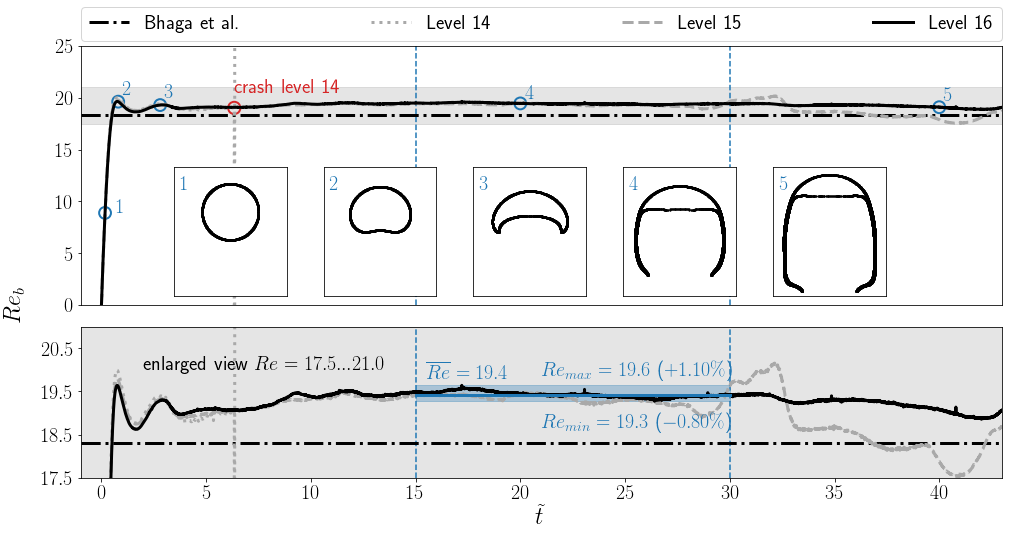

In [7]:
fig = plt.figure(figsize=(figure_width, 6))

# axis limits and zoom window definition
t_max = 43.0
tw_min = 15.0
tw_max = 30.0
re_zoom_min = 17.5
re_zoom_max = 21.0

# create basis for upper part of the plot
ax1 = plt.axes(upper_plot_bounds, xticks=[], xlim=[t_min, t_max], ylim=[0, 25])
ax1.fill_between([-1, 120], [re_zoom_min, re_zoom_min], [re_zoom_max, re_zoom_max], color='k', alpha=alpha_window)
ax1.tick_params(labelsize=fontsize_tick)
ax1.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)
ax1.axvline(tw_max, 0, 1, linestyle='--', color=highlight_color)
ax1.text(-4.5, 0, r"$Re_b$", va='center', rotation='vertical', fontsize=fontsize_label)

# create basis for lower part of the plot
ax2 = plt.axes(lower_plot_bounds, yticks=[17.5, 18.5, 19.5, 20.5], xlim=[t_min, t_max], ylim=[re_zoom_min, re_zoom_max])
ax2.patch.set_facecolor('k')
ax2.patch.set_alpha(alpha_window)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=fontsize_label)
ax2.tick_params(labelsize=fontsize_tick)
ax2.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)
ax2.axvline(tw_max, 0, 1, linestyle='--', color=highlight_color)

lines = [] # lines to appear in the legend

# reference curve Bhaga and Weber 1981
lines.append(ax1.plot([t_min, t_max], [18.3, 18.3], linestyle='-.', lw=line_width, color='k', label="Bhaga et al.")[0])
ax2.plot([t_min, t_max], [18.3, 18.3], linestyle='-.', lw=line_width, color='k')

# plot the numerical data in both sub-plots
for i, level in enumerate(range(14,17)):
    log = log_files["bhaga_04_l{:2d}".format(level)]
    t, re = log.get_profile("time", "u_x")
    re = re * Ga[6+i]
    lines.append(ax1.plot(t, re, color=colors[i], linestyle=styles[i], lw=line_width, label=labels[i])[0])
    ax2.plot(t, re, color=colors[i], linestyle=styles[i], lw=line_width)
    
# indicate statistical values in the lower plot (mean of finest mesh)
re_mean = log_files["bhaga_04_l16"].apply_to_range("time", tw_min, tw_max, "u_x", np.mean) * Ga[8]
re_min, re_max = log_files["bhaga_04_l16"].get_min_max("time", tw_min, tw_max, "u_x")
re_min *= Ga[8]
re_max *= Ga[8]
ax2.fill_between([tw_min, tw_max], [re_min, re_min], [re_max, re_max], color=highlight_color, alpha=0.3)
ax2.plot([tw_min, tw_max], [re_mean, re_mean], color=highlight_color, lw=line_width)
ax2.text(15.5, 19.8, r"$\overline{{Re}}={:.1f}$".format(re_mean), fontsize=fontsize_tick, color=highlight_color)
ax2.text(2, 20.0, r"enlarged view $Re={:.1f}...{:.1f}$".format(re_zoom_min, re_zoom_max), fontsize=fontsize_tick, color='k')
ax2.text(21, 18.6, r"$Re_{{min}}={:.1f}$ (${:+.2f}\%$)".format(re_min, (re_min-re_mean)/re_mean*100), fontsize=fontsize_tick, color=highlight_color)
ax2.text(21, 19.8, r"$Re_{{max}}={:.1f}$ (${:+.2f}\%$)".format(re_max, (re_max-re_mean)/re_mean*100), fontsize=fontsize_tick, color=highlight_color)

# include bubble shapes of selected time instances (snap shots) into the upper plot
closest_entries = []
for t in [0.17, 0.8, 2.8, 20.0, 40.0]:
    row = log_files["bhaga_04_l16"].find_closest("time", t)
    closest_entries.append(row)
    ax1.scatter(row.time, row.u_x*Ga[8], marker='o', s=140, facecolors='none', edgecolors=highlight_color, linewidth=2)

# draw shapes and position labels close to circles
offset_t = [0.5, 0.2, 0.2, 0.2, 0.2]
offset_re = [-0., 0.7, 0.7, 0.5, 0.6]
for i, row in enumerate(closest_entries):
    ax1.text(row.time+offset_t[i], row.u_x*Ga[8]+offset_re[i], r"${}$".format(i+1), color=highlight_color, fontsize=fontsize_tick)
    ax = plt.axes([0.13*(i+1)-0.15, 0.42, 0.3, 0.3], xticks=[], yticks=[], xlim=[-1.0, 1.0], ylim=[-1.5, 0.8])
    ax.set_aspect('equal')
    path_shape = data_path + "bhaga_04_l16/plic_clean/plic_{:06d}.pkl".format(row.index.values[0]*10)
    with open(path_shape, 'rb') as file:
        shape = pickle.load(file).drop("element", axis=1)
    ax.scatter(shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.scatter(-shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.text(ax.get_xlim()[0]*0.9, ax.get_ylim()[1]*0.5, r"${}$".format(i+1), color=highlight_color, fontsize=fontsize_tick)

# indicate crash of level 14 simulation
ax1.scatter(6.34, 0.6166*Ga[8], marker='o', s=150, facecolors='none', edgecolors='C3', linewidth=2)
ax1.text(6.34, 20.5, r"crash level 14", fontsize=fontsize_tick, color='C3')

ax1.legend(handles=lines, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0., fontsize=fontsize_legend)
savefig("bhaga_04_rise_velocity")

## Water 05 (1.8mm equivalent diameter, 20°C)

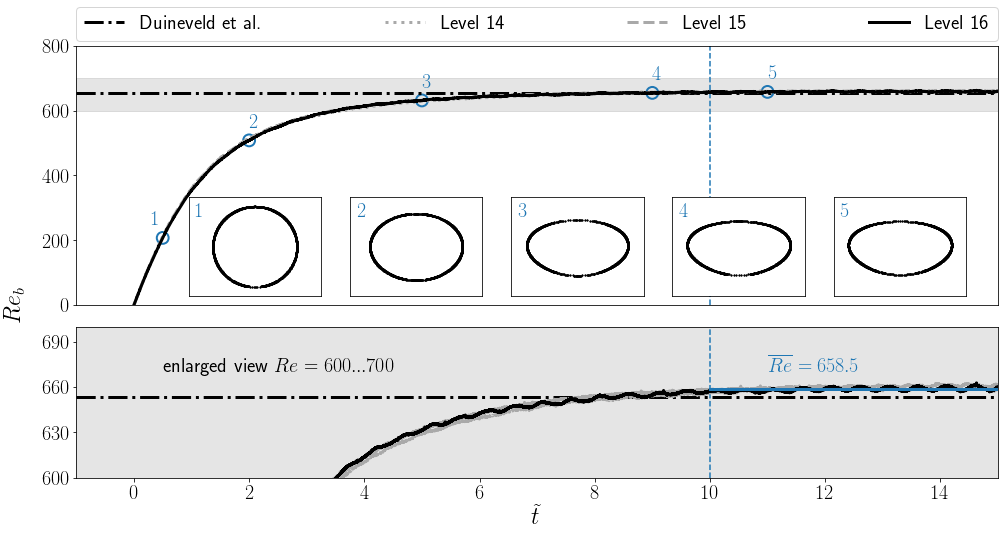

In [11]:
fig = plt.figure(figsize=(figure_width, 6))

# axis limits and zoom window definition
t_max = 15.0
tw_min = 10.0
tw_max = 15.0
re_zoom_min = 600.0
re_zoom_max = 700.0

# create basis for upper part of the plot
ax1 = plt.axes(upper_plot_bounds, xticks=[], xlim=[t_min, t_max], ylim=[0, 800])
ax1.fill_between([-1, 120], [re_zoom_min, re_zoom_min], [re_zoom_max, re_zoom_max], color='k', alpha=alpha_window)
ax1.tick_params(labelsize=fontsize_tick)
ax1.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)
ax1.text(-2.2, 0, r"$Re_b$", va='center', rotation='vertical', fontsize=fontsize_label)

# create basis for lower part of the plot
ax2 = plt.axes(lower_plot_bounds, yticks=[600, 630, 660, 690], xlim=[t_min, t_max], ylim=[re_zoom_min, re_zoom_max])
ax2.patch.set_facecolor('k')
ax2.patch.set_alpha(alpha_window)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=fontsize_label)
ax2.tick_params(labelsize=fontsize_tick)
ax2.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)

lines = [] # lines to appear in the legend

# reference curve Duineveld et al. 1995
lines.append(ax1.plot([t_min, t_max], [653.64, 653.64], linestyle='-.', lw=line_width, color='k', label="Duineveld et al.")[0])
ax2.plot([t_min, t_max], [653.64, 653.64], linestyle='-.', lw=line_width, color='k')

# plot the numerical data in both sub-plots
for i, level in enumerate(range(14,17)):
    log = log_files["water_05_l{:2d}".format(level)]
    t, re = log.get_profile("time", "u_x")
    re = re * Ga[9+i]
    lines.append(ax1.plot(t, re, color=colors[i], linestyle=styles[i], lw=line_width, label=labels[i])[0])
    ax2.plot(t, re, color=colors[i], linestyle=styles[i], lw=line_width)
    
# indicate statistical values in the lower plot (mean of finest mesh)
re_mean = log_files["water_05_l16"].apply_to_range("time", tw_min, tw_max, "u_x", np.mean) * Ga[11]
ax2.plot([tw_min, tw_max], [re_mean, re_mean], color=highlight_color, lw=line_width)
ax2.text(11.0, 670, r"$\overline{{Re}}={:.1f}$".format(re_mean), fontsize=fontsize_tick, color=highlight_color)
ax2.text(0.5, 670, r"enlarged view $Re={:.0f}...{:.0f}$".format(re_zoom_min, re_zoom_max), fontsize=fontsize_tick, color='k')

# include bubble shapes of selected time instances (snap shots) into the upper plot
closest_entries = []
for t in [0.5, 2.0, 5.0, 9.0, 11.0]:
    row = log_files["water_05_l16"].find_closest("time", t)
    closest_entries.append(row)
    ax1.scatter(row.time, row.u_x*Ga[11], marker='o', s=140, facecolors='none', edgecolors=highlight_color, linewidth=2)

# draw shapes and position labels close to circles
offset_t = [-0.2, 0.0, 0.0, 0.0, 0.0]
offset_re = [40, 40, 40, 40, 40]
for i, row in enumerate(closest_entries):
    ax1.text(row.time+offset_t[i], row.u_x*Ga[11]+offset_re[i], r"${}$".format(i+1), color=highlight_color, fontsize=fontsize_tick)
    ax = plt.axes([0.14*(i+1)-0.1, 0.42, 0.23, 0.23], xticks=[], yticks=[], xlim=[-0.8, 0.8], ylim=[-0.6, 0.6])
    ax.set_aspect('equal')
    path_shape = data_path + "water_05_l16/plic_clean/plic_{:06d}.pkl".format(row.index.values[0]*10)
    with open(path_shape, 'rb') as file:
        shape = pickle.load(file).drop("element", axis=1)
    ax.scatter(shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.scatter(-shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.text(ax.get_xlim()[0]*0.9, ax.get_ylim()[1]*0.6, r"${}$".format(i+1), color=highlight_color, fontsize=fontsize_tick)

ax1.legend(handles=lines, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0., fontsize=fontsize_legend)

savefig("water_05_rise_velocity")

# Mesh dependency of bubble shapes

In [9]:
# organize points in PLIC facets and transform to local reference frame
def assemble_facets(name, time):
    row = log_files[name].find_closest("time", time)
    path_shape = data_path + name + "/plic_clean/plic_{:06d}.pkl".format(row.index.values[0]*10)
    with open(path_shape, 'rb') as file:
        shape = pickle.load(file).drop("element", axis=1)
    facets = []
    for j in range(0, len(shape.px.values)-1, 2):
        facets.append([(shape.py.values[j], shape.px.values[j]-row.x.values),
                       (shape.py.values[j+1], shape.px.values[j+1]-row.x.values)])
    return facets

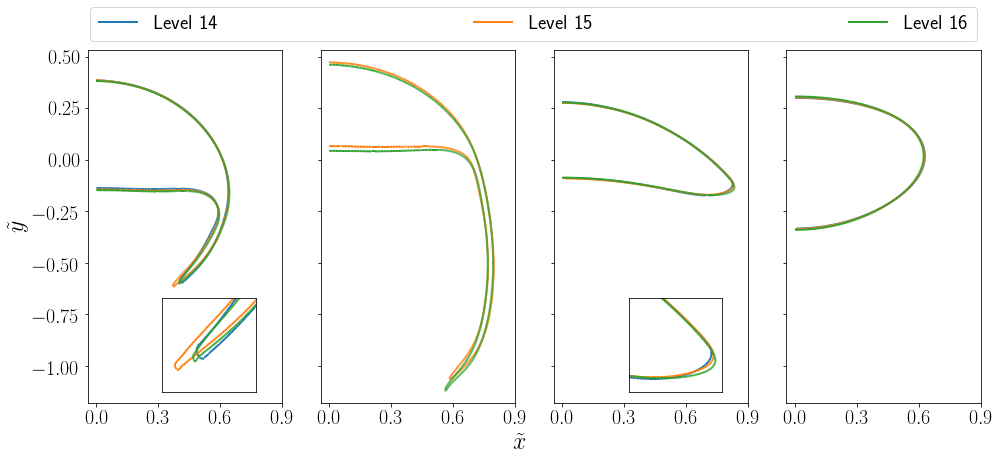

In [10]:
from matplotlib import collections  as mc
from copy import copy

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(figure_width, 6.5), sharey=True, sharex=True)

line_color = ["C0", "C1", "C2"]
labels = ['Level 14', 'Level 15', 'Level 16']
line_scale = 0.66

lines = [] # lines to appear in legend

# first plot: bhaga_02
ax1_zoom = plt.axes([0.13, 0.15, 0.2, 0.2], xticks=[], yticks=[], xlim=[0.35, 0.5], ylim=[-0.65, -0.5])
ax1_zoom.set_aspect('equal')
for i, name in enumerate(["bhaga_02_l14", "bhaga_02_l15", "bhaga_02_l16"]):
    facets = assemble_facets(name, 30)
    lc = mc.LineCollection(facets, colors=line_color[i], linewidths=line_width*line_scale,
                           linestyle="-", label=labels[i])
    lines.append(lc)
    lcc = copy(lc)
    ax1.add_collection(lc)
    ax1_zoom.add_collection(lcc)
    
# second plot: bhaga_04
for i, name in enumerate(["bhaga_04_l15", "bhaga_04_l16"]):
    facets = assemble_facets(name, 20)
    lc = mc.LineCollection(facets, colors=line_color[i+1], linewidths=line_width*line_scale, linestyle="-")
    ax2.add_collection(lc)
    
# third plot: bhaga_03
ax3_zoom = plt.axes([0.535, 0.15, 0.2, 0.2], xticks=[], yticks=[], xlim=[0.65, 0.85], ylim=[-0.2, 0.0])
ax3_zoom.set_aspect('equal')
for i, name in enumerate(["bhaga_03_l14", "bhaga_03_l15", "bhaga_03_l16"]):
    facets = assemble_facets(name, 30)
    lc = mc.LineCollection(facets, colors=line_color[i], linewidths=line_width*line_scale, linestyle="-")
    lcc = copy(lc)
    ax3.add_collection(lc)
    ax3_zoom.add_collection(lcc)
    
# fourth plot: water_05
for i, name in enumerate(["water_05_l14", "water_05_l15", "water_05_l16"]):
    facets = assemble_facets(name, 11)
    lc = mc.LineCollection(facets, colors=line_color[i], linewidths=line_width*line_scale, linestyle="-")
    ax4.add_collection(lc)
    ax4.autoscale()
    
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_aspect('equal')
    ax.tick_params(labelsize=fontsize_tick)
    ax.set_xticks([0.0, 0.3, 0.6, 0.9])
    
fig.text(0.5, 0.04, r"$\tilde{x}$", ha='center', va='center', fontsize=fontsize_label)
ax1.set_ylabel(r"$\tilde{y}$", fontsize=fontsize_label)
ax1.legend(handles=lines, bbox_to_anchor=(0., 1.02, 4.59, .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.1, fontsize=fontsize_tick)

savefig("shapes_l14_l15_l16")